### In this project i will use clustering algorithm, k-means, to reveal subgroups of wines based on the chemical analysis reports from load_wine dataset.
#### Import load_wine dataset from sklearn, create an object for the dataset and show its keys.

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


#### Import pandas and create a dataframe using our object data and its related feature_names and show the first and last 5 rows.

In [2]:
import pandas as pd

df = pd.DataFrame(wine.data, columns = wine.feature_names)

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Show the dataset shape: ( number of rows, number of columns )

In [3]:
df.shape

(178, 13)

#### Show the dataset description.

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### Show our dataframe Summary Statistics.

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Show useful information about the dataframe including number of columns, names of the columns and their data types.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#### Plot our dataframe using a scatter_matrix to see the distribution, the scatter_matrix plot a histogram for each feature and a scatter plot for each feature against another for the 3 types of iris species.

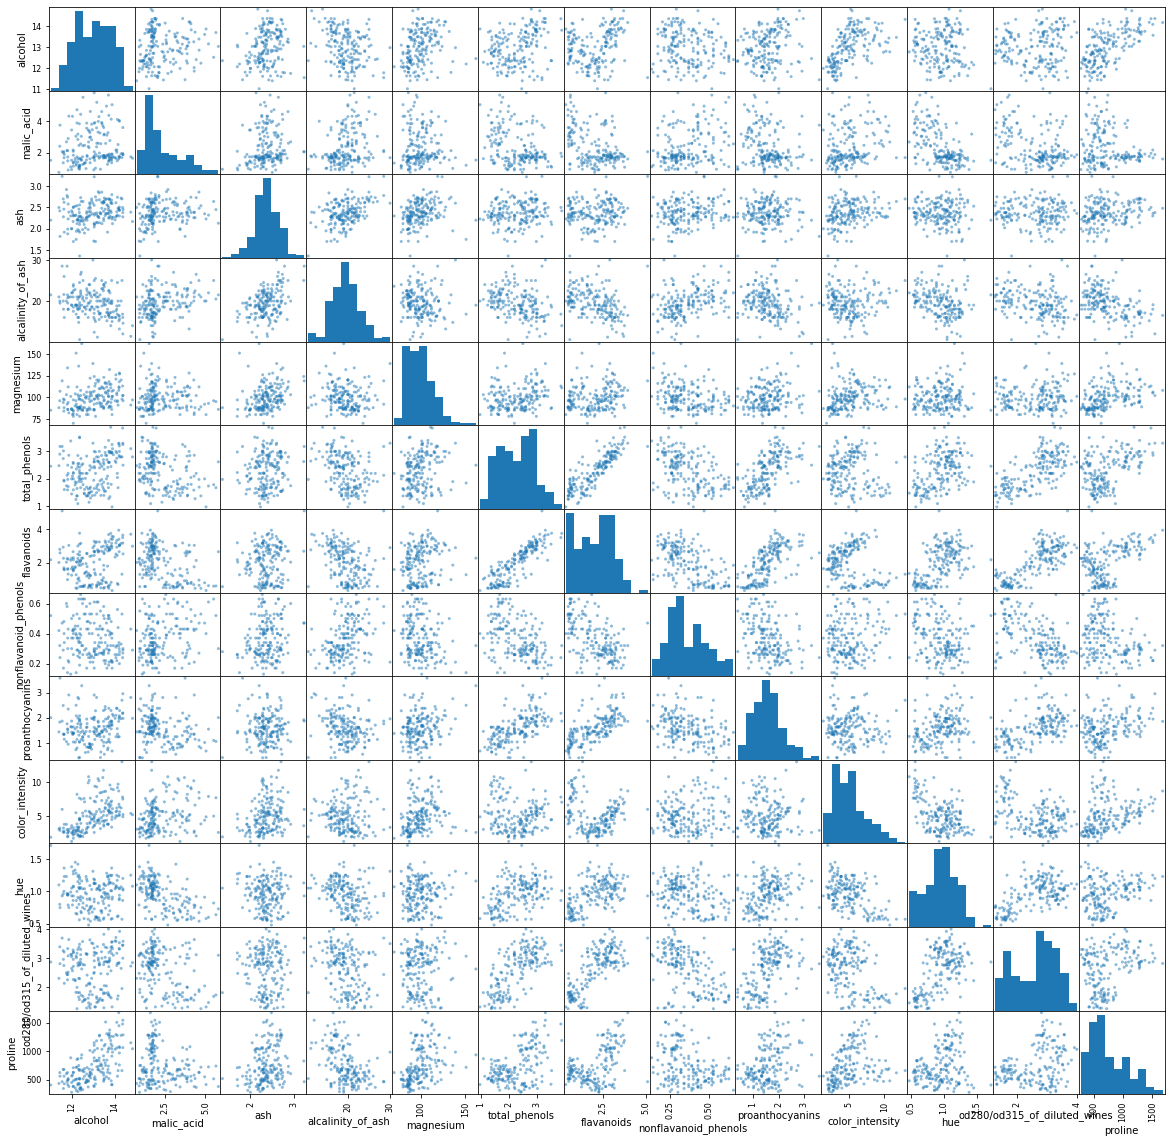

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))
plt.show()

#### After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: alcohol and total_phenols, whose scatterplot also suggests three subclusters.
#### Create our X array using the 2 features we picked.

In [8]:
X = df[['alcohol', 'total_phenols']].values

#### Since we are going to use kmeans and its unsupervised model,  we dont really know our target we cant create a y array , also we dont need to split our data into train and test set since there is no ground truth to validate the model, However we will need to scale all the data on same level, kmeans works better on data where each attribute is of similar scales.
#### We import standard scaler from sklearn, scale the X array and show the mean and the standard deviation.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Mean", X_scaled.mean(axis=0))
print("Standard deviation", X_scaled.std(axis=0))

Mean [ 7.84141790e-15 -1.95536471e-16]
Standard deviation [1. 1.]


#### We can see from the output that our mean became almost 0 and our standard deviation became 1, This happen after we scale the data.
#### Import kmeans from sklearn, Create our model, Then train the model on the scaled array X and create our y_predict and show the coordinates of the three centroids.

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X_scaled)
y_predict = km.predict(X_scaled)
print("Centroids coords\n", km.cluster_centers_)

Centroids coords
 [[-1.06183503  0.08414606]
 [ 0.92017418  0.87087204]
 [ 0.05253603 -1.14020926]]


#### Visualize our three centroids on a scatter plot

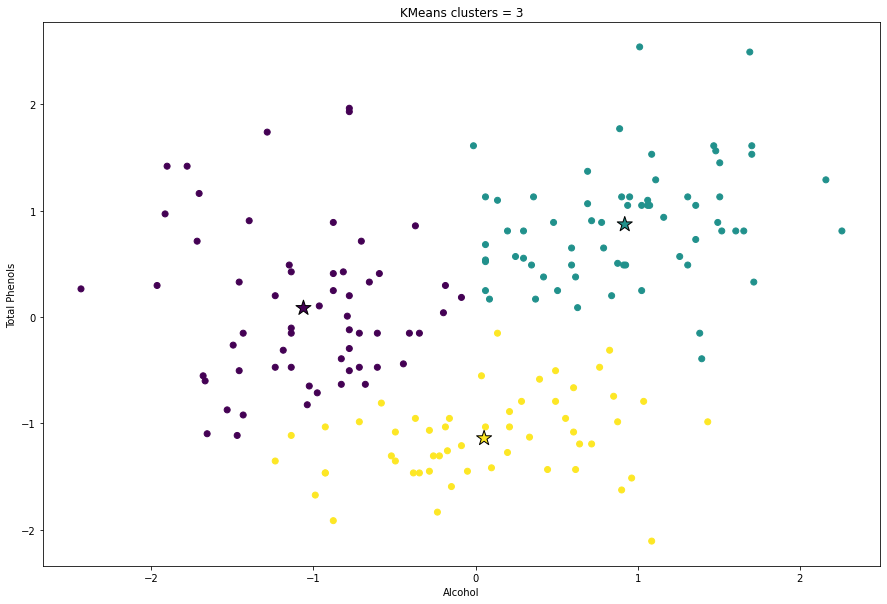

In [11]:
plt.figure(figsize = (15, 10))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_predict)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = "*",s = 250, c = [0, 1, 2], edgecolors = "k")
plt.xlabel("Alcohol")
plt.ylabel("Total Phenols")
plt.title("KMeans clusters = 3")
plt.show()

#### Now we can create a new array and let our model predict in which class it belongs to, Which show that the new array belongs to the third class.

In [12]:
import numpy as np

X_new = np.array([[13, 2.5]])

X_new_scaled = scaler.transform(X_new)

print("prediction:", km.predict(X_new_scaled))

prediction: [1]


#### But how do we know, which number of clusters we pick is the optimal 1?
#### We create a loop for number of clusters between 1 and 10 and and append the inertia for each 1 of them to an empty list, Then visualize it.
#### Note: inertia is the sum of squares of the distance from data point to its nearest centroid, meaning  we choose our optimal number of clusters when the distance stop decreasing.

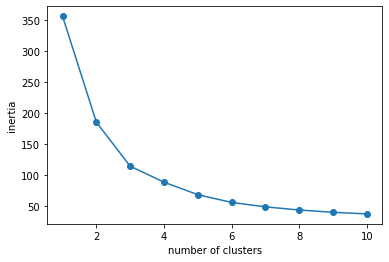

In [13]:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker = "o")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

#### Now let's use all our features in the X array, Scale it, Create a new k means model, Find the best k and Visualize it

All Features Shape: (178, 13) 

Features Means
 [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17] 

Standard Deviation
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


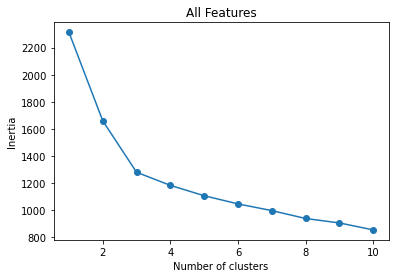

Predictions for 3 clusters
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 2 0 2 0 1 2 1 2
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


In [14]:
X_all_f = df[wine.feature_names]

X_all_scaled = scaler.fit_transform(X_all_f)
print("All Features Shape:", X_all_scaled.shape, "\n")
print("Features Means\n", X_all_scaled.mean(axis=0), "\n")
print("Standard Deviation\n", X_all_scaled.std(axis=0))

inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X_all_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("All Features")
plt.show()

k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print("Predictions for 3 clusters\n", y_pred)